In [2]:
# pip install clickhouse-connect

     ------------------------------------ 230.5/230.5 kB 440.6 kB/s eta 0:00:00
     -------------------------------------- 511.7/511.7 kB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
import clickhouse_connect

# Connect to ClickHouse server
conn = clickhouse_connect.get_client(
    host="144.214.151.31", port=8123, 
    username="nju_user", password="web3@2023"
)

if conn:
    print("Connection established successfully")

# 设置数据库
conn.database = "base_chain"

Connection established successfully


In [43]:
result = conn.query("select * from friendtech_buy_shares")

# address 是bytes 类型
result.result_set

[(3158002,
  3,
  b'0x3c134e38b540223393703c218c00688751f01e695b809aad3108fc980a42df2d',
  b'0x8B1208d49188FDCB165256c568D55a787429ac45',
  b'0xCF205808Ed36593aa40a44F10c7f7C2F67d4A4d4',
  b'0xE2317964FDebE0490Ce28e72fe243C7b8c4C23BA',
  1,
  datetime.datetime(2023, 8, 27, 3, 2, 31, tzinfo=<StaticTzInfo 'Etc/UTC'>)),
 (3158004,
  1,
  b'0xf56bab686277bb6e07cccfbf34c5bc916c65fcf59f2e6eb7f056cb4ab0971081',
  b'0xc28EeaD27c92419Dd355720c349C9e80c9C1b1Df',
  b'0xCF205808Ed36593aa40a44F10c7f7C2F67d4A4d4',
  b'0x1912Bc4584929037024444Fdf737802C25ED0F77',
  1,
  datetime.datetime(2023, 8, 27, 3, 2, 35, tzinfo=<StaticTzInfo 'Etc/UTC'>)),
 (3158006,
  3,
  b'0x82da72a2e6a4fe4a2b4a546afdec902947c5d924584104540d5bdcaab3b38bdf',
  b'0xE016fFF5778b21662dAf09C8C513678fF5CCF641',
  b'0xCF205808Ed36593aa40a44F10c7f7C2F67d4A4d4',
  b'0x0F4D052c370d9060DB42e455e5C361047E628167',
  1,
  datetime.datetime(2023, 8, 27, 3, 2, 39, tzinfo=<StaticTzInfo 'Etc/UTC'>)),
 (3158008,
  1,
  b'0xd8eb04c4234f7819a1b13

In [44]:
import pandas as pd

# 根据查询结果创建df
df = pd.DataFrame(data=result.result_set, 
                  columns=result.column_names)

df.set_index('transaction_hash', inplace=True)

df.head()

,block_number,transaction_index,from,to,shares_subject,amount,time_stamp
transaction_hash,,,,,,,
b'0x3c134e38b540223393703c218c00688751f01e695b809aad3108fc980a42df2d',3158002,3,b'0x8B1208d49188FDCB165256c568D55a787429ac45',b'0xCF205808Ed36593aa40a44F10c7f7C2F67d4A4d4',b'0xE2317964FDebE0490Ce28e72fe243C7b8c4C23BA',1,2023-08-27 03:02:31+00:00
b'0xf56bab686277bb6e07cccfbf34c5bc916c65fcf59f2e6eb7f056cb4ab0971081',3158004,1,b'0xc28EeaD27c92419Dd355720c349C9e80c9C1b1Df',b'0xCF205808Ed36593aa40a44F10c7f7C2F67d4A4d4',b'0x1912Bc4584929037024444Fdf737802C25ED0F77',1,2023-08-27 03:02:35+00:00
b'0x82da72a2e6a4fe4a2b4a546afdec902947c5d924584104540d5bdcaab3b38bdf',3158006,3,b'0xE016fFF5778b21662dAf09C8C513678fF5CCF641',b'0xCF205808Ed36593aa40a44F10c7f7C2F67d4A4d4',b'0x0F4D052c370d9060DB42e455e5C361047E628167',1,2023-08-27 03:02:39+00:00
b'0xd8eb04c4234f7819a1b13fcd29e2fc60c94ab6704f134fb8df89252bc7458dbc',3158008,1,b'0x9B9001A6c65a27E995418e8DbAc2CC0b3f8f9d37',b'0xCF205808Ed36593aa40a44F10c7f7C2F67d4A4d4',b'0x0C320A426b8FB7A1721b12104616544dC71ef350',1,2023-08-27 03:02:43+00:00
b'0x1d461c1dac8b465a9edec4b36b730e138dece4548f458a5c1fcba9f76f136c1d',3158014,1,b'0x9B9001A6c65a27E995418e8DbAc2CC0b3f8f9d37',b'0xCF205808Ed36593aa40a44F10c7f7C2F67d4A4d4',b'0x0C320A426b8FB7A1721b12104616544dC71ef350',1,2023-08-27 03:02:55+00:00


2023-08-10 07:15:47+00:00 2023-08-27 04:09:07+00:00


<AxesSubplot:title={'center':'Daily Sum of Amount'}, xlabel='Date', ylabel='Total Amount'>

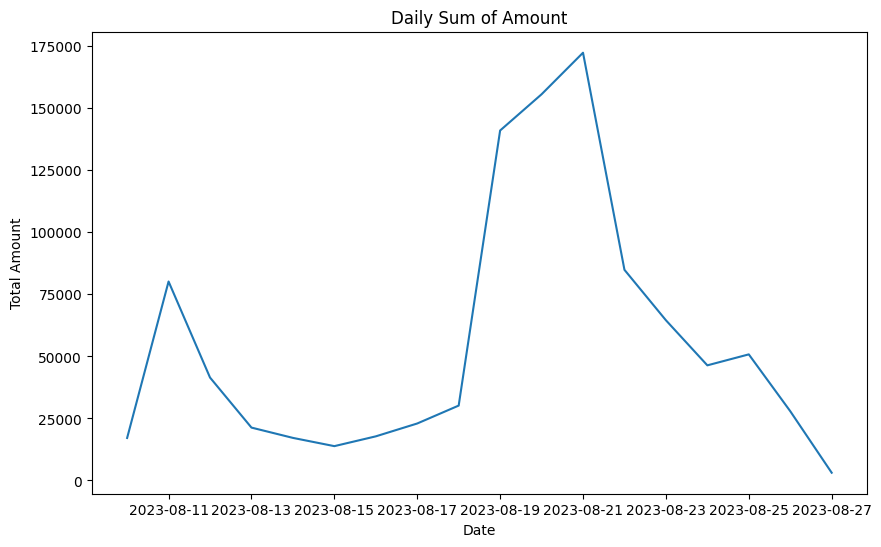

In [50]:
# 获取时间起始点
print(df['time_stamp'].min(), df['time_stamp'].max())

# 记录每天的amount总和，并可视化

df["date"] = pd.to_datetime(df['time_stamp'], unit='s').dt.date

# Calculate the sum of amount for each day
daily_sum = df.groupby('date')['amount'].sum()

# Visualize the daily sum using a line plot
daily_sum.plot(
    kind='line', figsize=(10, 6), xlabel='Date', 
    ylabel='Total Amount', title='Daily Sum of Amount'
)

